# USING ARIMA MODEL TO FORECASTING MICROSOFT STOCKS FUTURE PRICES

**Abstract**
---

It is very important to predict stock prices because the predictions will help us in making appropriate investing and trading decisions. It also allow us with the knowledge to hold , sell, buy a particular thus helping us in optimizing stock portfolio and and maximize rerturns.

Predicting stock prices can assist in managing investment risks. By understanding the potential volatility and downside risks associated with specific stocks or portfolios, investors can implement risk mitigation strategies, such as diversification or hedging, to protect their investments.

Stock predictions can impact strategic business decisions. For example, companies may use stock price forecasts to determine the timing and pricing of initial public offerings (IPOs), assess potential mergers and acquisitions, or evaluate investment
opportunities.


---

**Problem, Source Of Dataset**
---

*Defining task* :-
USing historical stock data of Microsoft of the past 100 days train ARIMA model to forecast the stock prices of the next 30 days.

*Sorce of data* :- "https://alpha-vantage.p.rapidapi.com/query"

Rapidapi was used to get the daily historical data of Microsoft. Alpha Vantage api was used to to retreive the data. The data was exported in Json format.

---

**Data description**
---

Fields :-  

Date - The index of stock data represents the dates on which the stock data is recorded.

Open - Opening price of the stock at that particular day

Close - Closing price of the stock at that particular day

High - Highest price of stock reached at that particualr day

Low - Lowest price of stock reached at that particular day

Volume - No. of stocks traded at that particular day


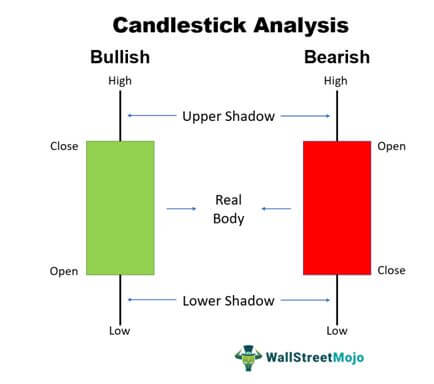

This image gies us a brief description about how to read a candlestick chart .

---

**Selection of Project**
---

ARIMA model was selected for the modelling of data for this project because ARIMA (Autoregressive Integrated Moving Average) is a popular time series forecasting model that is often used for predicting stock prices. Here are a few reasons why ARIMA is commonly considered suitable for forecasting stock prices :-


**Autocorrelation**: Stock prices tend to exhibit autocorrelation, meaning that the current value of a stock price is influenced by its past values. ARIMA models capture this autocorrelation by incorporating autoregressive terms that take into account the past observations of the series.


**Stationarity**: ARIMA models require the time series to be stationary, meaning that its statistical properties, such as mean and variance, do not change over time. While stock prices are generally not stationary, the differencing operation in ARIMA (the "I" in ARIMA) can be applied to make the series stationary. Differencing computes the differences between consecutive observations, which can remove trends or seasonality in the data.


**Moving Average Component**: Stock prices often exhibit a moving average behavior, where the current value is influenced by the average of past values. The moving average component in ARIMA helps capture this behavior by considering the weighted average of past errors.


**Simplicity and Interpretability**: ARIMA models are relatively straightforward to understand and interpret. They rely on a small number of parameters, making them less complex than some other advanced forecasting models. This simplicity can be advantageous when explaining the model to stakeholders or analyzing the results.


**Historical Data Availability**: Stock prices are time series data, and historical prices are usually readily available. ARIMA models are suitable for analyzing and forecasting such data, as they primarily rely on the time-dependent nature of the series.

---

**About ARIMA model**
---

ARIMA (Autoregressive Integrated Moving Average) is a widely used time series forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components. It is particularly suited for analyzing and predicting time-dependent data with trends, seasonality, and autocorrelation. Here's a breakdown of the components and key concepts associated with the ARIMA model:

**Autoregressive (AR) Component**: The autoregressive component refers to the dependence of the current value on its past values. It assumes that the current value of the time series is linearly related to its previous values. The "p" parameter in ARIMA (ARIMA(p, d, q)) represents the number of lagged observations included in the model.

**Differencing (I)**: The differencing component aims to make the time series stationary by subtracting the previous observation from the current one. If the data has a trend or seasonality, differencing can help remove these patterns and make the series stationary. The "d" parameter in ARIMA represents the order of differencing applied to the time series.

**Moving Average (MA) Component**: The moving average component considers the influence of past forecast errors on the current value. It assumes that the current value is related to the error terms from previous predictions. The "q" parameter in ARIMA represents the number of lagged forecast errors included in the model.




  







**CODE STARTS HERE**
---

In [ ]:
#installing TA-LIB
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   2483      0 --:--:-- --:--:-- --:--:--  2483
100   363  100   363    0     0   1234      0 --:--:-- --:--:-- --:--:--  1234
100 1299k  100 1299k    0     0   694k      0  0:00:01  0:00:01 --:--:-- 2591k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [ ]:
# importing Mplfinance and yfinance for analysis and better visualisation of stock data
!pip install yfinance
!pip install mplfinance


In [ ]:
# installing pmdarima for autoarima and statsmodels for other calculations and functions.
!pip install statsmodels
!pip install pmdarima

In [ ]:
#importing libraries and modules
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import json
import talib
import mplfinance as fplot
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
#importing data from API using requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"MSFT","outputsize":"compact","datatype":"json"}

headers = {
	"X-RapidAPI-Key": "4081704bfbmsh526e63d1febe419p1b88b9jsnc34b0c03b8e4",
	"X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()
print(data)


{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2023-06-28', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-06-28': {'1. open': '334.6600', '2. high': '337.9800', '3. low': '333.8100', '4. close': '335.8500', '5. volume': '20259523'}, '2023-06-27': {'1. open': '331.8600', '2. high': '336.1500', '3. low': '329.3000', '4. close': '334.5700', '5. volume': '24354110'}, '2023-06-26': {'1. open': '333.7200', '2. high': '336.1100', '3. low': '328.4900', '4. close': '328.6000', '5. volume': '21520582'}, '2023-06-23': {'1. open': '334.3600', '2. high': '337.9600', '3. low': '333.4500', '4. close': '335.0200', '5. volume': '23146901'}, '2023-06-22': {'1. open': '334.1200', '2. high': '340.1200', '3. low': '333.3400', '4. close': '339.7100', '5. volume': '23556764'}, '2023-06-21': {'1. open': '336.3700', '2. high': '337.7300', '3. low': '332.0700', '4. close': '333.5600', '5

In [ ]:
#Convertung the Json file to pandas dataframe for fuutur analysis and calculation for KPI
df = pd.DataFrame(data['Time Series (Daily)'])
df

,2023-06-28,2023-06-27,2023-06-26,2023-06-23,2023-06-22,2023-06-21,2023-06-20,2023-06-16,2023-06-15,2023-06-14,...,2023-02-16,2023-02-15,2023-02-14,2023-02-13,2023-02-10,2023-02-09,2023-02-08,2023-02-07,2023-02-06,2023-02-03
1. open,334.6600,331.8600,333.7200,334.3600,334.1200,336.3700,339.3100,351.3200,337.4800,334.3400,...,264.0200,268.3200,272.6700,267.6400,261.5300,273.8000,273.2000,260.5300,257.4400,259.5420
2. high,337.9800,336.1500,336.1100,337.9600,340.1200,337.7300,342.0800,351.4700,349.8400,339.0400,...,266.7400,270.7300,274.9700,274.6000,264.0900,273.9800,276.7600,268.7750,258.3000,264.2000
3. low,333.8100,329.3000,328.4900,333.4500,333.3400,332.0700,335.8600,341.9500,337.2000,332.8100,...,261.9000,266.1800,269.2800,267.1500,260.6620,262.8000,266.2100,260.0800,254.7800,257.1000
4. close,335.8500,334.5700,328.6000,335.0200,339.7100,333.5600,338.0500,342.3300,348.1000,337.3400,...,262.1500,269.3200,272.1700,271.3200,263.1000,263.6200,266.7300,267.5600,256.7700,258.3500
5. volume,20259523,24354110,21520582,23146901,23556764,25117799,26375407,46551985,38899075,26003791,...,29603616,28962163,37047924,44630921,25818489,42375102,54686049,50841365,22517997,29077256


In [ ]:
#shifting columns to rows by using transpose
df = df.transpose()
df

,1. open,2. high,3. low,4. close,5. volume
2023-06-28,334.6600,337.9800,333.8100,335.8500,20259523
2023-06-27,331.8600,336.1500,329.3000,334.5700,24354110
2023-06-26,333.7200,336.1100,328.4900,328.6000,21520582
2023-06-23,334.3600,337.9600,333.4500,335.0200,23146901
2023-06-22,334.1200,340.1200,333.3400,339.7100,23556764
...,...,...,...,...,...
2023-02-09,273.8000,273.9800,262.8000,263.6200,42375102
2023-02-08,273.2000,276.7600,266.2100,266.7300,54686049
2023-02-07,260.5300,268.7750,260.0800,267.5600,50841365
2023-02-06,257.4400,258.3000,254.7800,256.7700,22517997


In [ ]:
# reindexing according to dates ( most recent dates at the bottom and earlier dates athe the top)
df = df.reindex(index=df.index[::-1])
df

,1. open,2. high,3. low,4. close,5. volume
2023-02-03,259.5420,264.2000,257.1000,258.3500,29077256
2023-02-06,257.4400,258.3000,254.7800,256.7700,22517997
2023-02-07,260.5300,268.7750,260.0800,267.5600,50841365
2023-02-08,273.2000,276.7600,266.2100,266.7300,54686049
2023-02-09,273.8000,273.9800,262.8000,263.6200,42375102
...,...,...,...,...,...
2023-06-22,334.1200,340.1200,333.3400,339.7100,23556764
2023-06-23,334.3600,337.9600,333.4500,335.0200,23146901
2023-06-26,333.7200,336.1100,328.4900,328.6000,21520582
2023-06-27,331.8600,336.1500,329.3000,334.5700,24354110


In [ ]:
# renaming the columns to facilitate better and easy analysis
df.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low','4. close':'Close','5. volume':'Volume'}, inplace= True)
df

,Open,High,Low,Close,Volume
2023-02-03,259.5420,264.2000,257.1000,258.3500,29077256
2023-02-06,257.4400,258.3000,254.7800,256.7700,22517997
2023-02-07,260.5300,268.7750,260.0800,267.5600,50841365
2023-02-08,273.2000,276.7600,266.2100,266.7300,54686049
2023-02-09,273.8000,273.9800,262.8000,263.6200,42375102
...,...,...,...,...,...
2023-06-22,334.1200,340.1200,333.3400,339.7100,23556764
2023-06-23,334.3600,337.9600,333.4500,335.0200,23146901
2023-06-26,333.7200,336.1100,328.4900,328.6000,21520582
2023-06-27,331.8600,336.1500,329.3000,334.5700,24354110


In [ ]:
# knowing the dimensions of the dataframe
df.shape

(100, 5)

In [ ]:
# knowing the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-02-03 to 2023-06-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    100 non-null    object
 1   High    100 non-null    object
 2   Low     100 non-null    object
 3   Close   100 non-null    object
 4   Volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [ ]:
#changing the data type of the columns
df =df.astype({'Open':'float','High':'float','Low':'float','Close':'float','Volume':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-02-03 to 2023-06-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   High    100 non-null    float64
 2   Low     100 non-null    float64
 3   Close   100 non-null    float64
 4   Volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7+ KB


In [ ]:
# describing the data for more insights
df.describe(include='all')

,Open,High,Low,Close,Volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,292.705120,295.821677,290.045673,293.076900,2.947821e+07
std,29.123907,29.373767,29.106303,29.383027,9.951175e+06
min,246.550000,250.930000,245.610000,246.270000,1.633655e+07
25%,268.150000,274.445000,265.455000,268.880000,2.306507e+07
50%,286.255000,289.435000,284.245000,288.335000,2.650772e+07
75%,317.205000,319.927500,315.530000,318.385000,3.195163e+07
max,351.320000,351.470000,341.950000,348.100000,6.952737e+07


In [ ]:
# converting the index to datetime datatype and lebelling it as date
df['date'] = df.index
df.index = pd.DatetimeIndex(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-02-03 to 2023-06-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   High    100 non-null    float64
 2   Low     100 non-null    float64
 3   Close   100 non-null    float64
 4   Volume  100 non-null    int64  
 5   date    100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.5+ KB


In [ ]:
# Checking if index has misising values because it will create problems in furthur analysis
df.index.to_series().diff().dt.days > 1

date
2023-02-03    False
2023-02-06     True
2023-02-07    False
2023-02-08    False
2023-02-09    False
              ...  
2023-06-22    False
2023-06-23    False
2023-06-26     True
2023-06-27    False
2023-06-28    False
Name: date, Length: 100, dtype: bool

In [ ]:
df

,Open,High,Low,Close,Volume,date
date,,,,,,
2023-02-03,259.542,264.200,257.10,258.35,29077256,2023-02-03
2023-02-06,257.440,258.300,254.78,256.77,22517997,2023-02-06
2023-02-07,260.530,268.775,260.08,267.56,50841365,2023-02-07
2023-02-08,273.200,276.760,266.21,266.73,54686049,2023-02-08
2023-02-09,273.800,273.980,262.80,263.62,42375102,2023-02-09
...,...,...,...,...,...,...
2023-06-22,334.120,340.120,333.34,339.71,23556764,2023-06-22
2023-06-23,334.360,337.960,333.45,335.02,23146901,2023-06-23
2023-06-26,333.720,336.110,328.49,328.60,21520582,2023-06-26


In [ ]:
# Inserting the missing date entries in the dataset to make the data more continuous, as the stock market is closed on saturdays and sundays
idx = pd.date_range('2023-02-03', '2023-06-27')
df = df.reindex(idx)
df

,Open,High,Low,Close,Volume,date
2023-02-03,259.542,264.200,257.10,258.35,29077256.0,2023-02-03
2023-02-04,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-05,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-06,257.440,258.300,254.78,256.77,22517997.0,2023-02-06
2023-02-07,260.530,268.775,260.08,267.56,50841365.0,2023-02-07
...,...,...,...,...,...,...
2023-06-23,334.360,337.960,333.45,335.02,23146901.0,2023-06-23
2023-06-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-25,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-26,333.720,336.110,328.49,328.60,21520582.0,2023-06-26


In [ ]:
# choosing close price for linear interpolation to fill the null values. Future predictions will also be done on closing price.
df['Close'].interpolate(method='linear',inplace=True)


In [ ]:
df

,Open,High,Low,Close,Volume,date
2023-02-03,259.542,264.200,257.10,258.350000,29077256.0,2023-02-03
2023-02-04,NaN,NaN,NaN,257.823333,NaN,NaN
2023-02-05,NaN,NaN,NaN,257.296667,NaN,NaN
2023-02-06,257.440,258.300,254.78,256.770000,22517997.0,2023-02-06
2023-02-07,260.530,268.775,260.08,267.560000,50841365.0,2023-02-07
...,...,...,...,...,...,...
2023-06-23,334.360,337.960,333.45,335.020000,23146901.0,2023-06-23
2023-06-24,NaN,NaN,NaN,332.880000,NaN,NaN
2023-06-25,NaN,NaN,NaN,330.740000,NaN,NaN
2023-06-26,333.720,336.110,328.49,328.600000,21520582.0,2023-06-26


<Axes: >

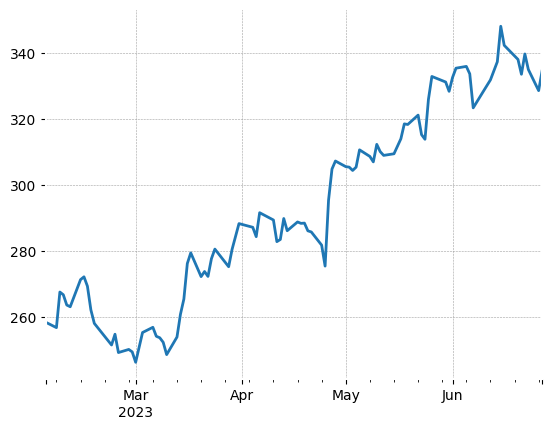

In [ ]:
# Basic plotting to see the if it is an uptrend or a downtrend
df['Close'].plot()

In [ ]:
#interpolating rest of the columns
df['Open'].interpolate(method='linear',inplace=True)
df['High'].interpolate(method='linear',inplace=True)
df['Low'].interpolate(method='linear',inplace=True)

In [ ]:
# as interpolation will not work properly on volume data I replaed the null values in the volu colum with the mean of the volume column
df['Volume'].fillna(df['Volume'].median(),inplace=True)

In [ ]:
df

,Open,High,Low,Close,Volume,date,Volatility,SMA,RSI,EMA
2023-02-03,259.542000,264.200000,257.100000,258.350000,2.907726e+07,2023-02-03,7.100000,NaN,NaN,NaN
2023-02-04,258.841333,262.233333,256.326667,257.823333,2.957133e+07,NaN,5.906667,NaN,NaN,NaN
2023-02-05,258.140667,260.266667,255.553333,257.296667,2.957133e+07,NaN,4.713333,257.823333,NaN,257.823333
2023-02-06,257.440000,258.300000,254.780000,256.770000,2.251800e+07,2023-02-06,3.520000,257.296667,0.000000,257.296667
2023-02-07,260.530000,268.775000,260.080000,267.560000,5.084136e+07,2023-02-07,8.695000,260.542222,91.106108,262.428333
...,...,...,...,...,...,...,...,...,...,...
2023-06-23,334.360000,337.960000,333.450000,335.020000,2.314690e+07,2023-06-23,4.510000,336.096667,37.554351,336.510784
2023-06-24,334.146667,337.343333,331.796667,332.880000,2.957133e+07,NaN,5.546667,335.870000,29.880229,334.695392
2023-06-25,333.933333,336.726667,330.143333,330.740000,2.957133e+07,NaN,6.583333,332.880000,22.870078,332.717696
2023-06-26,333.720000,336.110000,328.490000,328.600000,2.152058e+07,2023-06-26,7.620000,330.740000,16.916833,330.658848


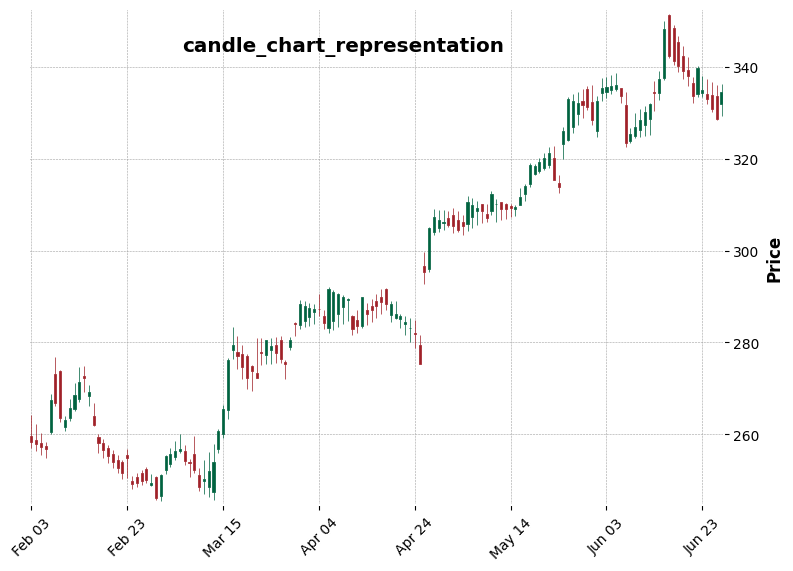

In [ ]:
# plotting the candlestick graph for the stock as the first KPI(to analyse the uptrend or downtrend)
fplot.plot(df, type = 'candle', style = 'charles', title = 'candle_chart_representation', ylabel ='Price',tight_layout =True)

In [ ]:
# creating 2nd KPI as Volatility
df['Volatility'] =  df['High']-df['Low']

In [ ]:
df

,Open,High,Low,Close,Volume,date,Volatility
2023-02-03,259.542000,264.200000,257.100000,258.350000,2.907726e+07,2023-02-03,7.100000
2023-02-04,258.841333,262.233333,256.326667,257.823333,2.957133e+07,NaN,5.906667
2023-02-05,258.140667,260.266667,255.553333,257.296667,2.957133e+07,NaN,4.713333
2023-02-06,257.440000,258.300000,254.780000,256.770000,2.251800e+07,2023-02-06,3.520000
2023-02-07,260.530000,268.775000,260.080000,267.560000,5.084136e+07,2023-02-07,8.695000
...,...,...,...,...,...,...,...
2023-06-23,334.360000,337.960000,333.450000,335.020000,2.314690e+07,2023-06-23,4.510000
2023-06-24,334.146667,337.343333,331.796667,332.880000,2.957133e+07,NaN,5.546667
2023-06-25,333.933333,336.726667,330.143333,330.740000,2.957133e+07,NaN,6.583333
2023-06-26,333.720000,336.110000,328.490000,328.600000,2.152058e+07,2023-06-26,7.620000


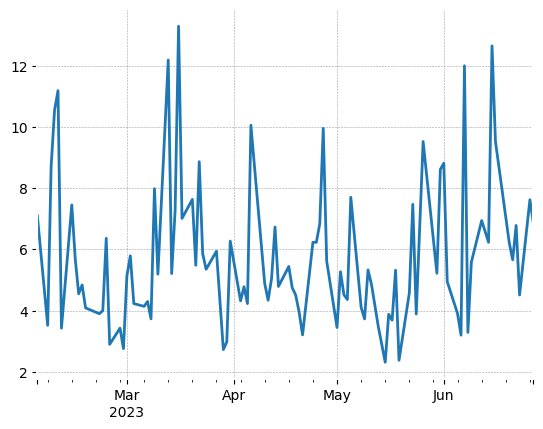

<Figure size 2000x1500 with 0 Axes>

In [ ]:
#visually representing the volatility ( Volatility basically tells us how much the prices to of the stock change wrt to time, so by seeing this we can say that stock is highly volatile)
df['Volatility'].plot()
plt.xlabel =("Volatility")
plt.ylabel =("prices")
plt.title = ("Volatility graph")
plt.figure(figsize=(20,15))
plt.show()

In [ ]:
# Adding some new analytical parameters to the table named
#SMA :- Simple moving Average
#RSI :-Relative strength index
#EMA :- Exponential Moving average
df['SMA'] = talib.SMA(df.Close,timeperiod=3)
df['RSI'] = talib.RSI(df.Close,timeperiod=3)
df['EMA'] = talib.EMA(df.Close,timeperiod=3)

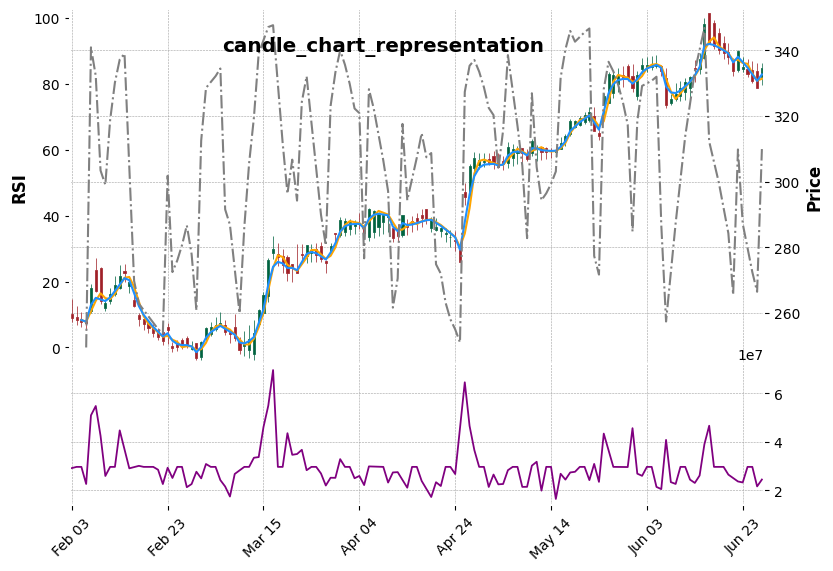

In [ ]:
#plotting SMA ,EMA ,RSI and Candlestick plot along with volume for better understanding of data and better analysis
sma = fplot.make_addplot(df["SMA"], color="orange", width=1.5)
ema = fplot.make_addplot(df["EMA"], color="dodgerblue", width=1.5)
rsi = fplot.make_addplot(df["RSI"], color="grey", width=1.5, ylabel="RSI",secondary_y=True, linestyle='dashdot')

## Adding data to volume subplot
volume = fplot.make_addplot(df["Volume"], color="purple", panel=1)
fplot.plot(df, type = 'candle', style = 'charles', title = 'candle_chart_representation', ylabel ='Price',tight_layout =True, addplot = [sma, ema, rsi, volume])

In [ ]:
# Adfuller test to know if my stock data is stationary or not, stationary dast has p-value below 0.05 , our p value is 0.84 that is our data is not stationary
adfuller_result = adfuller(df['Close'].dropna())
print(adfuller_result)

(-0.593584487927321, 0.872425090073402, 0, 144, {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}, 721.6749762980653)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2023-02-03 to 2023-06-27
Freq: D
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        145 non-null    float64
 1   High        145 non-null    float64
 2   Low         145 non-null    float64
 3   Close       145 non-null    float64
 4   Volume      145 non-null    float64
 5   date        99 non-null     object 
 6   Volatility  145 non-null    float64
 7   SMA         143 non-null    float64
 8   RSI         142 non-null    float64
 9   EMA         143 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


In [ ]:
# Creating a new dataset to work on
df_differencing = df[{'Close','Open','High','Low','Volume'}]

<ipython-input-148-46e222249163>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_differencing = df[{'Close','Open','High','Low','Volume'}]


In [ ]:
df_differencing

,Open,Volume,Close,High,Low
2023-02-03,259.542000,2.907726e+07,258.350000,264.200000,257.100000
2023-02-04,258.841333,2.957133e+07,257.823333,262.233333,256.326667
2023-02-05,258.140667,2.957133e+07,257.296667,260.266667,255.553333
2023-02-06,257.440000,2.251800e+07,256.770000,258.300000,254.780000
2023-02-07,260.530000,5.084136e+07,267.560000,268.775000,260.080000
...,...,...,...,...,...
2023-06-23,334.360000,2.314690e+07,335.020000,337.960000,333.450000
2023-06-24,334.146667,2.957133e+07,332.880000,337.343333,331.796667
2023-06-25,333.933333,2.957133e+07,330.740000,336.726667,330.143333
2023-06-26,333.720000,2.152058e+07,328.600000,336.110000,328.490000


In [ ]:
# Differencing to make our non-stationary data stationary
df1 = df_differencing - df_differencing.shift(1)

In [ ]:
df1

,Open,Volume,Close,High,Low
2023-02-03,NaN,NaN,NaN,NaN,NaN
2023-02-04,-0.700667,4.940750e+05,-0.526667,-1.966667,-0.773333
2023-02-05,-0.700667,0.000000e+00,-0.526667,-1.966667,-0.773333
2023-02-06,-0.700667,-7.053334e+06,-0.526667,-1.966667,-0.773333
2023-02-07,3.090000,2.832337e+07,10.790000,10.475000,5.300000
...,...,...,...,...,...
2023-06-23,0.240000,-4.098630e+05,-4.690000,-2.160000,0.110000
2023-06-24,-0.213333,6.424430e+06,-2.140000,-0.616667,-1.653333
2023-06-25,-0.213333,0.000000e+00,-2.140000,-0.616667,-1.653333
2023-06-26,-0.213333,-8.050749e+06,-2.140000,-0.616667,-1.653333


<Axes: >

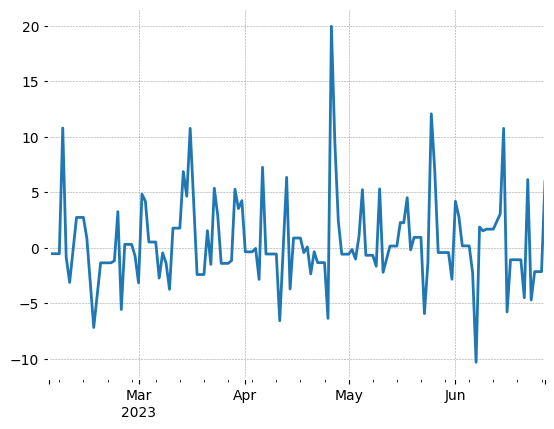

In [ ]:
# Verifying that our data has become stationary after differencing
df1['Close'].plot()

In [ ]:
# Using Adfuller model to know the p-value of the differenced dataset
adfuller_result_differencing = adfuller(df1['Close'].dropna())
print(adfuller_result_differencing)

(-10.391702311127501, 2.0130847179200532e-18, 0, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 715.9576357368279)


<Figure size 1200x800 with 0 Axes>

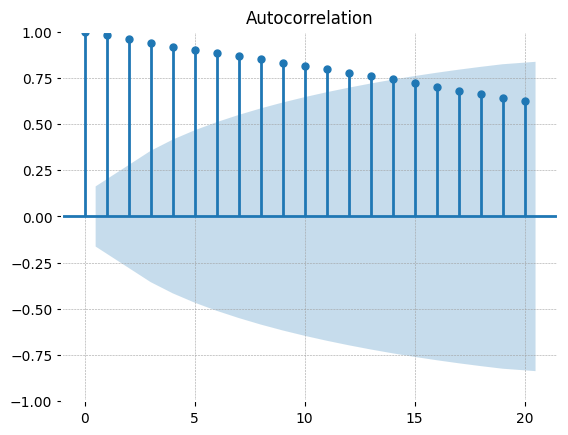

<Figure size 1200x800 with 0 Axes>

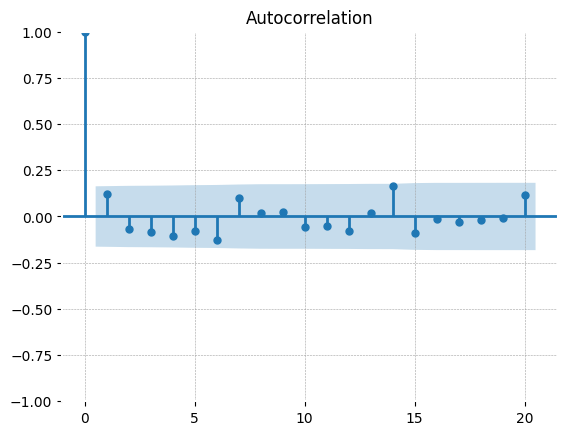

In [ ]:
# Plotting the Autocorelation function(ACF) for both aur dataset and differenced data of CLOSE prices
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.tsa.plot_acf(df_differencing['Close'].dropna(), lags = 20)
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.tsa.plot_acf(df1['Close'].dropna(), lags = 20)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

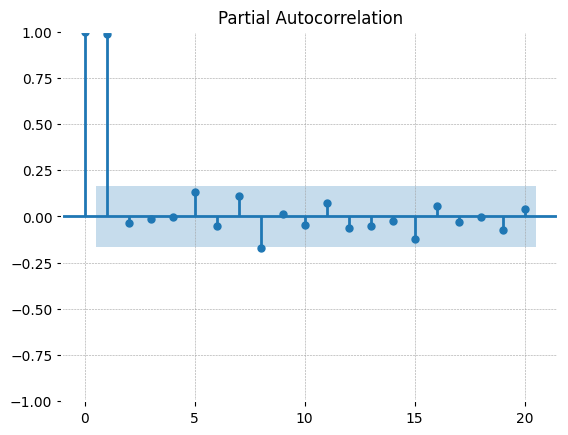

<Figure size 1200x800 with 0 Axes>

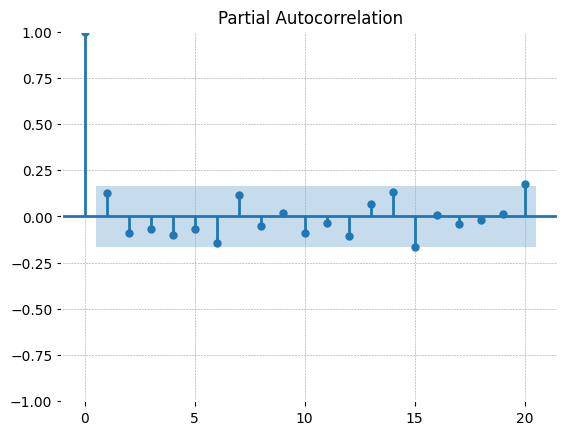

In [ ]:
# Plotting the Partial autocorelation function(PACF) for both aur dataset and differenced data of CLOSE prices
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.tsa.plot_pacf(df_differencing['Close'].dropna(), lags =20)
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.tsa.plot_pacf(df1['Close'].dropna(), lags =20)

In [ ]:
# Usuing autoarima to predict the most scuitable values of (p,d,q) parametres needed in ARIMA model.
autoarima = auto_arima(df['Close'], stepwise=False, seasonal=False)
autoarima

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
# splititng data into training and testing set
train =df.iloc[:-20]
test=df.iloc[-20:]
train.shape, test.shape

((125, 10), (20, 10))

In [ ]:
# Training our SRIMA model
model = ARIMA(train['Close'], order = (2,1,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  125
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -340.470
Date:                Thu, 29 Jun 2023   AIC                            690.940
Time:                        03:49:04   BIC                            705.041
Sample:                    02-03-2023   HQIC                           696.668
                         - 06-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8173      0.652      1.253      0.210      -0.461       2.095
ar.L2         -0.2478      0.678     -0.366      0.715      -1.576       1.081
ma.L1         -0.6020      0.659     -0.913      0.361      -1.895       0.690
ma.L2          0.0183      0.665      0.028      0.978      -1.285       1.322
sigma2        14.1941      1.032     13.754      0.000      12.171      16.217
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               332.85
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.61
Prob(H) (two-sided):                  0.61   Kurtosis:                        10.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#predicting values of testing set using ARIMA model
start = len(train['Close'])
end = len(train['Close']) + len(test['Close']) -1
predictions = model_fit.predict(start=start, end=end,type='levels')
predictions.index = df.index[start:end +1]
print(predictions)

2023-06-08    321.314222
2023-06-09    322.000645
2023-06-10    323.073544
2023-06-11    323.780361
2023-06-12    324.092210
2023-06-13    324.171952
2023-06-14    324.159855
2023-06-15    324.130210
2023-06-16    324.108977
2023-06-17    324.098969
2023-06-18    324.096050
2023-06-19    324.096144
2023-06-20    324.096944
2023-06-21    324.097575
2023-06-22    324.097892
2023-06-23    324.097995
2023-06-24    324.098001
2023-06-25    324.097980
2023-06-26    324.097961
2023-06-27    324.097951
Freq: D, Name: predicted_mean, dtype: float64


<Axes: >

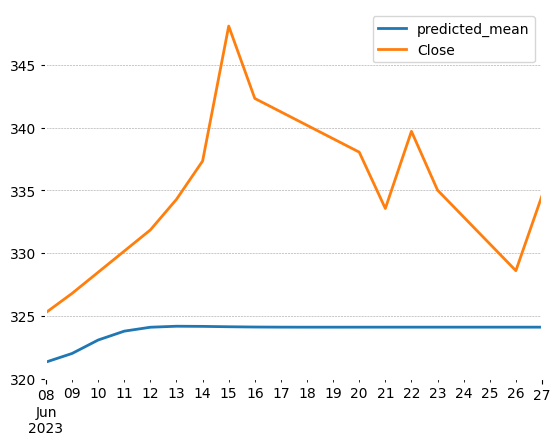

In [ ]:
#Plotting predictions and data together
predictions.plot(legend=True)
test['Close'].plot(legend=True)

In [ ]:
# RMSE values are used to find the accuracy of the model. RMSE values are not so goood but they are reasonable and shows that the model is decent
test_mean = test['Close'].mean()
print(test_mean)
rmse = sqrt(mean_squared_error(predictions,test['Close']))
print(rmse)

334.915
12.30636422126208


<Axes: >

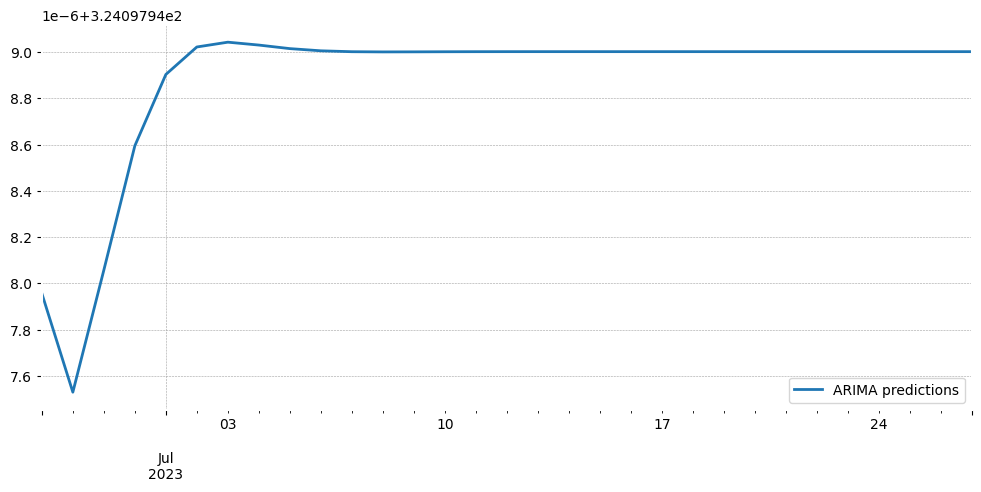

In [ ]:
# Prediciting next 30 days values according to ARIMA model which was trained on the dataset.
future_dates = pd.date_range(start = '2023-06-27', end = '2023-07-27')
predictions1 = model_fit.predict(start=len(df), end=len(df)+30 , type='levels').rename('ARIMA predictions')
predictions1.index = future_dates
predictions1.plot(legend=True, figsize = (12,5))

In [ ]:
#priting all the next 30 days values
print(predictions1)

2023-06-27    324.097948
2023-06-28    324.097948
2023-06-29    324.097948
2023-06-30    324.097949
2023-07-01    324.097949
2023-07-02    324.097949
2023-07-03    324.097949
2023-07-04    324.097949
2023-07-05    324.097949
2023-07-06    324.097949
2023-07-07    324.097949
2023-07-08    324.097949
2023-07-09    324.097949
2023-07-10    324.097949
2023-07-11    324.097949
2023-07-12    324.097949
2023-07-13    324.097949
2023-07-14    324.097949
2023-07-15    324.097949
2023-07-16    324.097949
2023-07-17    324.097949
2023-07-18    324.097949
2023-07-19    324.097949
2023-07-20    324.097949
2023-07-21    324.097949
2023-07-22    324.097949
2023-07-23    324.097949
2023-07-24    324.097949
2023-07-25    324.097949
2023-07-26    324.097949
2023-07-27    324.097949
Freq: D, Name: ARIMA predictions, dtype: float64


**THANK YOU**
---